# **WQD7003 : DATA ANALYTICS**

# Title: Heart Disease Prediction Using Classification Algorithms


# Introduction (Business Understanding)

## Data Understanding

 The data used was obtained from Kaggle with a title "Personal Key Indicators of Heart Disease". This data consists of approximately 300,000 records that were collected by Centers for Disease Control and Prevention (CDC) in 2020.

## Business Goal


The primary business goal of developing a predictive model for heart disease is to enhance patient outcomes by enabling early identification and intervention for at-risk individuals. By leveraging advanced analytics to assess risk factors, healthcare organizations can optimize resource allocation, reduce costs associated with late-stage treatment, and empower patients to take proactive steps toward managing their heart health. This initiative not only aims to improve the quality of care but also positions the organization as a leader in preventive healthcare, ultimately driving patient engagement and satisfaction while fostering long-term financial sustainability.


##Research Objective

1. Identify Key Risk Factors: Analyze existing datasets to determine the most significant risk factors associated with heart disease, including demographic, lifestyle, and clinical variables.

2. Develop Predictive Algorithms: Create and validate predictive models using machine learning techniques to accurately assess an individual's risk of developing heart disease.

3. Evaluate Model Performance: Assess the predictive accuracy and reliability of the developed models through metrics like accuracy, precision, recall, and ROC-AUC score.

4. Comparative Analysis of Models: Investigate and compare the effectiveness of various machine learning algorithms (e.g., logistic regression, decision trees, random forests) in predicting heart disease risk.

# Loading Dataset

In [70]:
# Importing the library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [71]:
# import the dataset
heart = pd.read_csv(r'/content/HeartDisease.csv')
heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# Data Pre-processing


In [72]:
# Get main information of columns and total of data in the dataset (column's name, data type, etc)
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [73]:
# get details of the datasets (count, mean, std, etc)
heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [74]:
# example of the dataset
heart.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [75]:
# to check if the dataset have any null value
total_NullVal = heart.isnull().sum().sort_values(ascending=False)
percent_NullVal = (heart.isnull().sum() / heart.isnull().count()).sort_values(ascending=False)
missing_data_NullVal = pd.concat([total_NullVal, percent_NullVal], axis=1, keys=['Total Count of Missing Value', 'Percent'])
missing_data_NullVal

,Total Count of Missing Value,Percent
HeartDisease,0,0.0
BMI,0,0.0
KidneyDisease,0,0.0
Asthma,0,0.0
SleepTime,0,0.0
GenHealth,0,0.0
PhysicalActivity,0,0.0
Diabetic,0,0.0
Race,0,0.0
AgeCategory,0,0.0


In [76]:
# to check if the dataset have any duplicate entries (row)
heart_wDupEnt = heart.drop_duplicates(inplace=True)
print(heart_wDupEnt)
heart.duplicated()

None


,0
0,False
1,False
2,False
3,False
4,False
...,...
319790,False
319791,False
319792,False
319793,False


In [77]:
# make a dataframe with continuous columns
heart_cont = heart.select_dtypes(include = ['int64','float64'])
print("Continuous columns: \n")
heart_cont

Continuous columns: 



,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


In [78]:
# make a dataframe with categorical columns
heart_cat = heart.select_dtypes(include =['object', 'category'])
print("Categorical columns: \n")
heart_cat

Categorical columns: 



,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


In [79]:
# to check if the continuous columns have any outliers
heart_wOutliers = pd.DataFrame(index=heart_cont.columns, columns=['outliers', 'outliers%'])
for col in heart_cont.columns:
    if any(x in str(heart[col].dtype) for x in ['int', 'float']):
        heart_wOutliers.loc[col, 'count'] = len(heart_cont)
        heart_wOutliers.loc[col, 'q1'] = heart_cont[col].quantile(0.25)
        heart_wOutliers.loc[col, 'q3'] = heart_cont[col].quantile(0.75)
        heart_wOutliers.loc[col, 'iqr'] = heart_wOutliers.loc[col, 'q3'] - heart_wOutliers.loc[col, 'q1']
        heart_wOutliers.loc[col, 'lower'] = heart_wOutliers.loc[col, 'q1'] - (3 * heart_wOutliers.loc[col, 'iqr'])
        heart_wOutliers.loc[col, 'upper'] = heart_wOutliers.loc[col, 'q3'] + (3 * heart_wOutliers.loc[col, 'iqr'])
        heart_wOutliers.loc[col, 'min'] = heart_cont[col].min()
        heart_wOutliers.loc[col, 'max'] = heart_cont[col].max()
        heart_wOutliers.loc[col, 'outliers'] = ((heart_cont[col] < heart_wOutliers.loc[col, 'lower']) | (heart_cont[col] > heart_wOutliers.loc[col, 'upper'])).sum()
        heart_wOutliers.loc[col, 'outliers%'] = np.round(heart_wOutliers.loc[col, 'outliers'] / len(heart_cont) * 100)
heart_wOutliers

,outliers,outliers%,count,q1,q3,iqr,lower,upper,min,max
BMI,1183,0.0,301717.0,24.03,31.65,7.62,1.17,54.51,12.02,94.85
PhysicalHealth,40313,13.0,301717.0,0.00,2.00,2.00,-6.00,8.00,0.00,30.00
MentalHealth,26692,9.0,301717.0,0.00,4.00,4.00,-12.00,16.00,0.00,30.00
SleepTime,659,0.0,301717.0,6.00,8.00,2.00,0.00,14.00,1.00,24.00


# Exploratory Data Analysis (EDA)

#### Exploratory Data Analysis (EDA) involves examining and visualizing the dataset to gain insights, understand data patterns, and identify potential issues. It helps in formulating hypotheses, data analysis and modeling steps.

<Figure size 800x400 with 0 Axes>

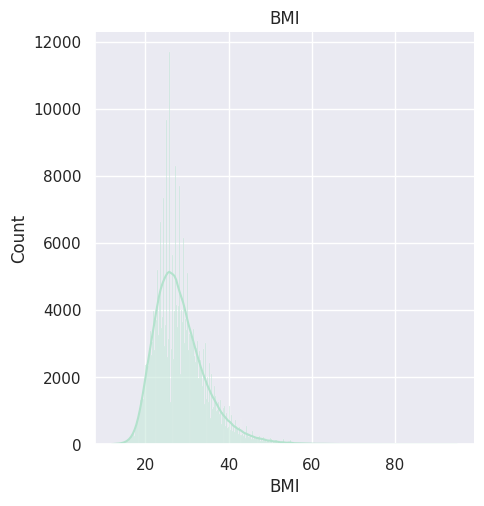

<Figure size 800x400 with 0 Axes>

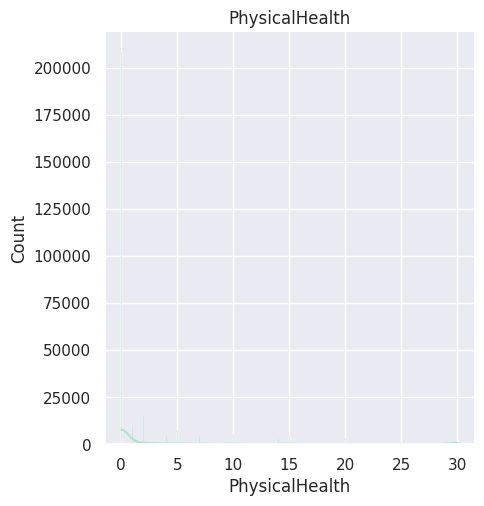

<Figure size 800x400 with 0 Axes>

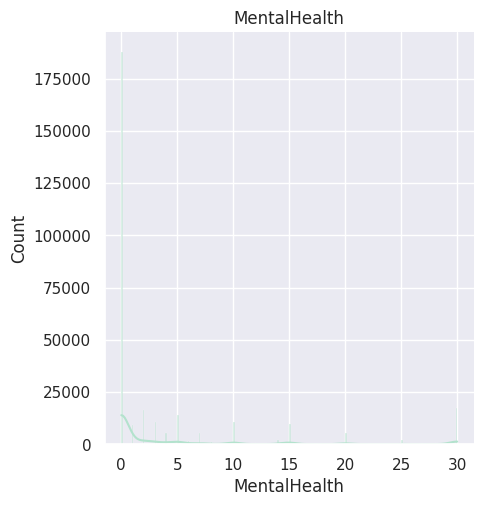

<Figure size 800x400 with 0 Axes>

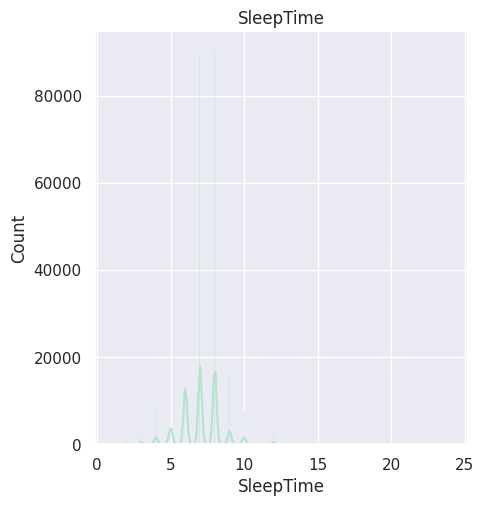

In [80]:
# create and analyse a DataFrame that containing only continuous data columns
heart_wCont = pd.DataFrame(heart_cont)
# plot distplot for continuous data columns
for col in heart_wCont.columns:
    plt.figure()
    sns.displot(heart_wCont[col], kde=True)
    plt.title(col)
plt.show()

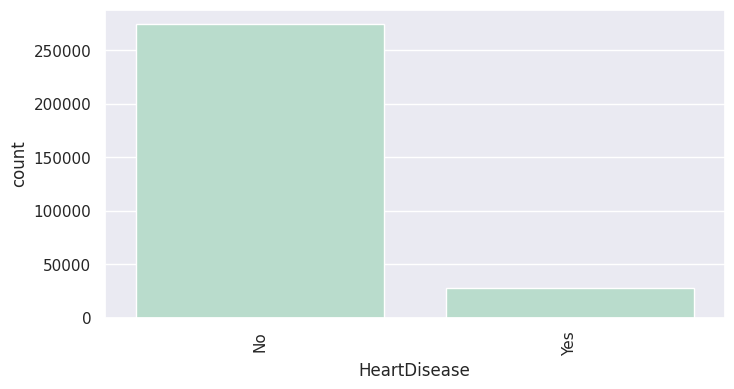

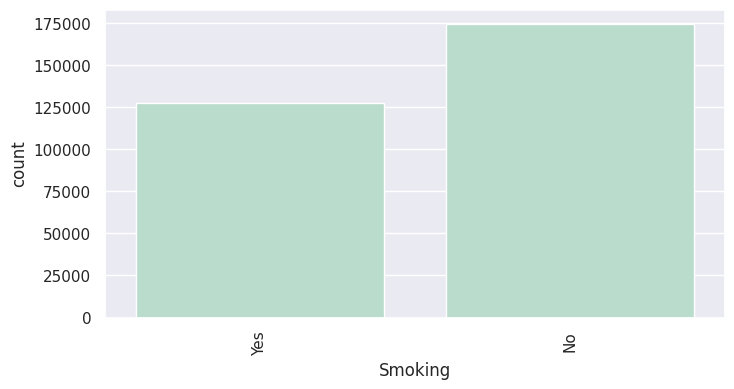

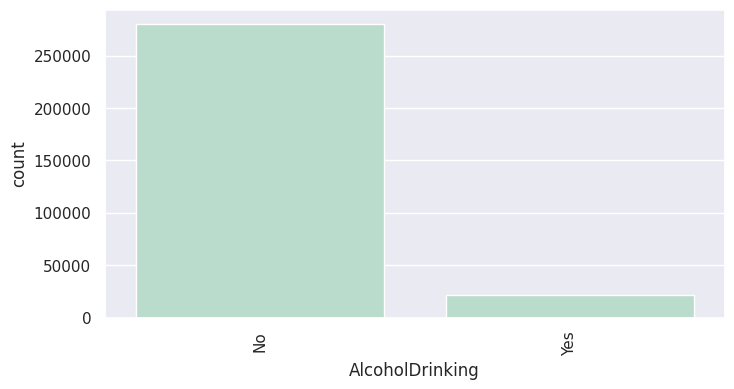

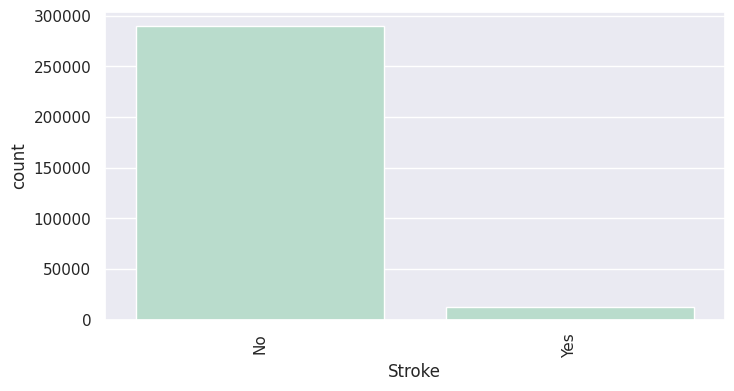

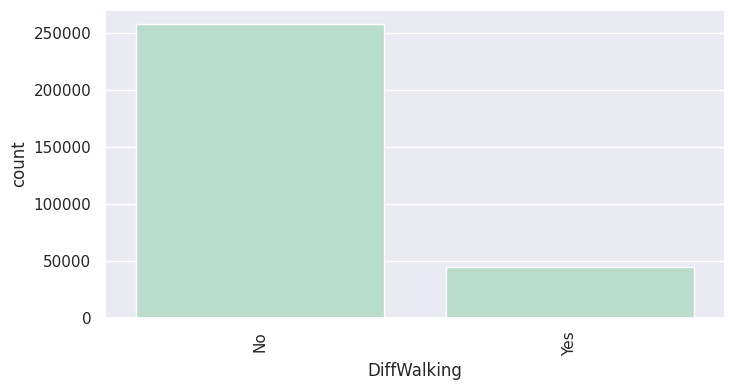

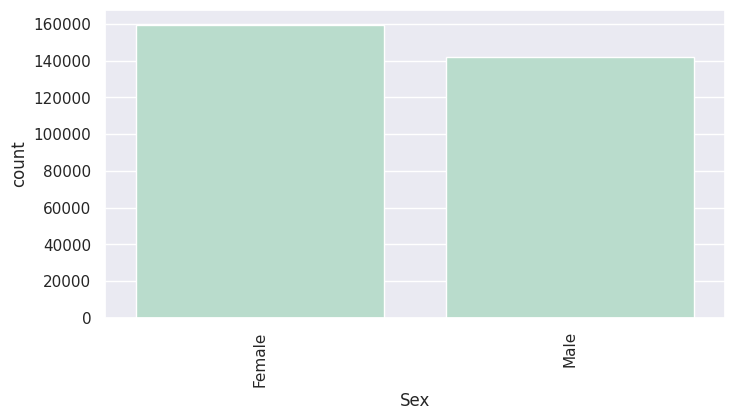

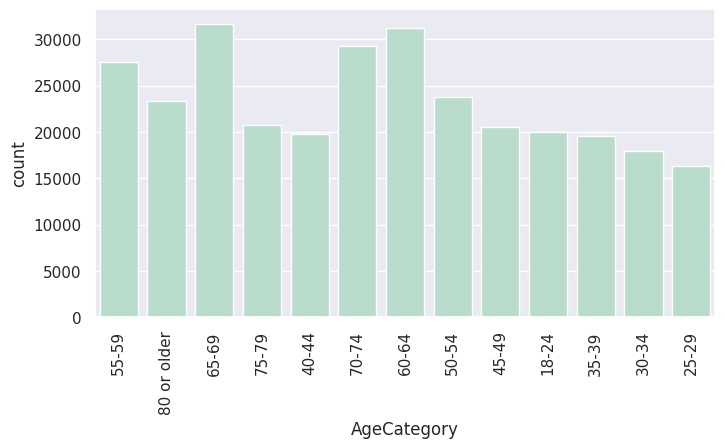

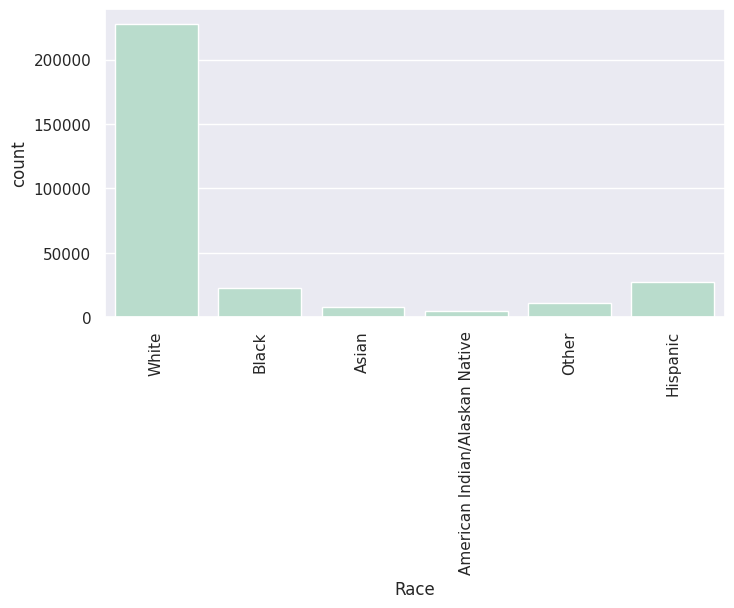

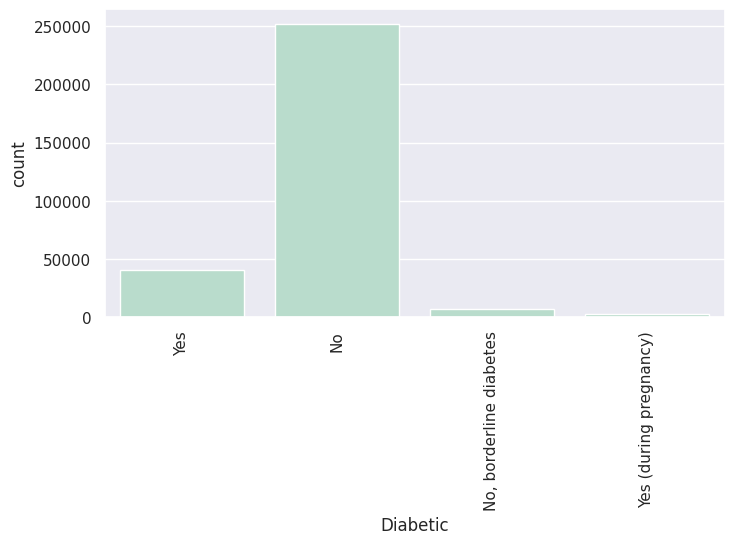

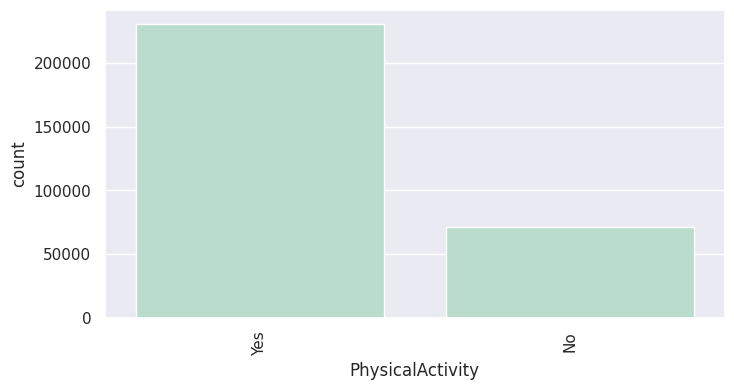

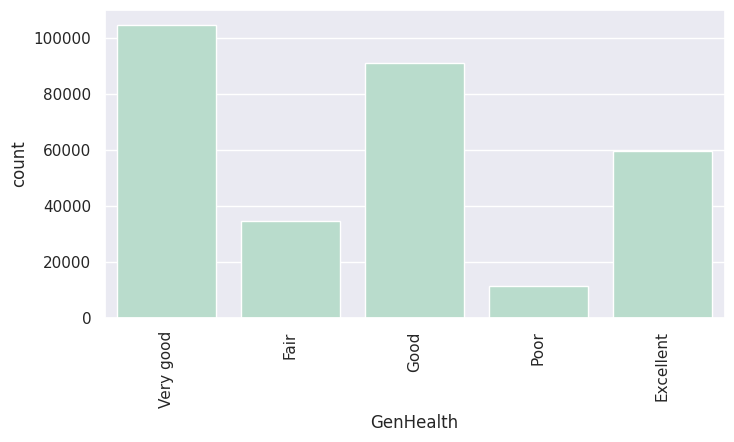

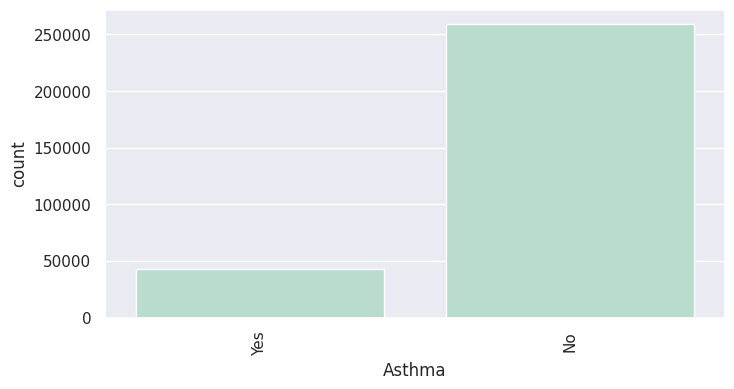

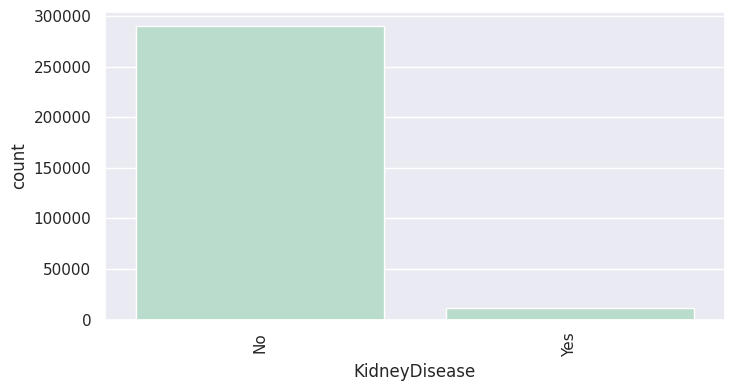

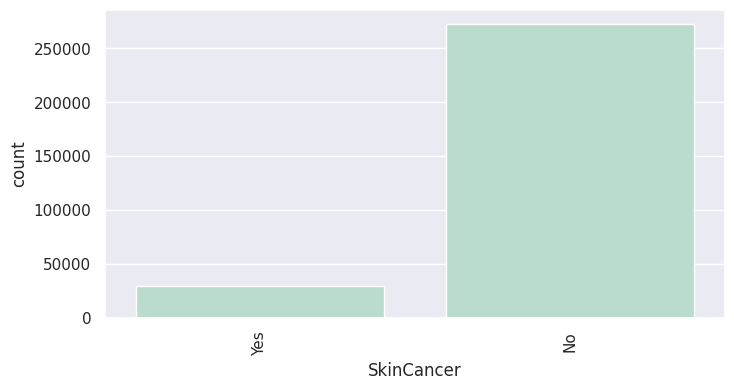

In [81]:
# create and analyse a DataFrame that containing only categorical data columns
# plot countplot for categorical data columns
for col in heart_cat.columns:
    plt.figure()
    sns.countplot(x=col, data=heart_cat)
    plt.xticks(rotation=90)

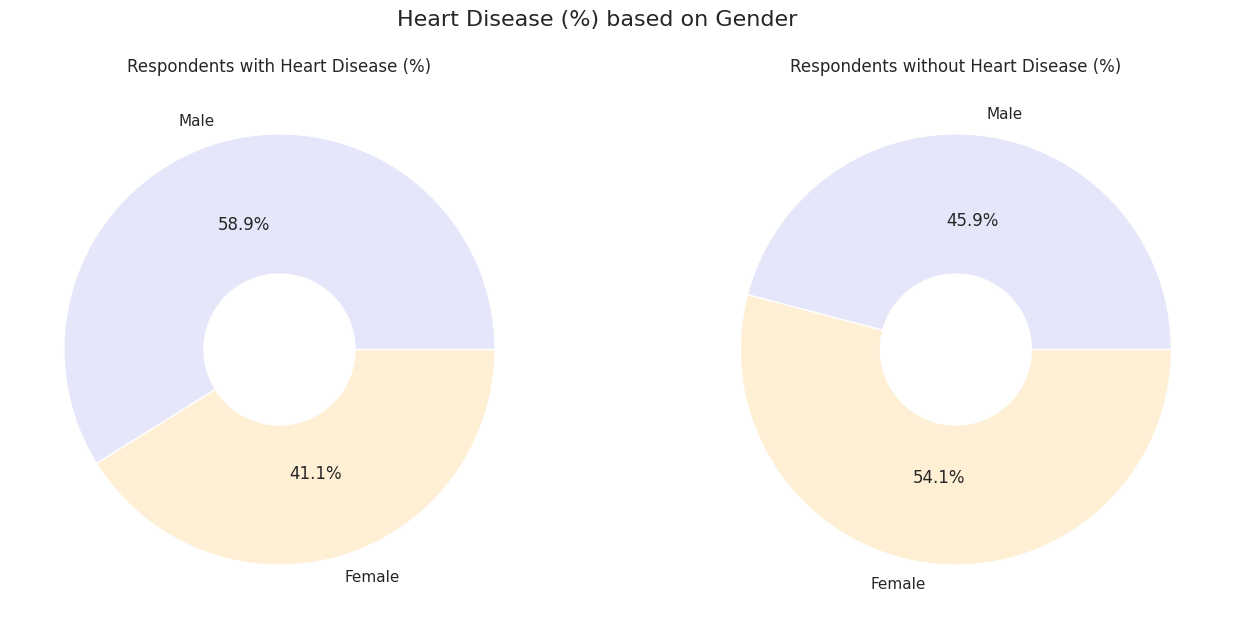

In [82]:
# 1 EDA - Identify the percentage of respondents with and without Heart Disease based on Gender using Donut Chart
g_row, g_col = 1, 2
g_fig = plt.figure(figsize= (g_col * 8, g_row * 7)) #figsize: size of the figure. kalau mcm ni, it'll be rectangle as col(x-axis) lgi byk from row(y-axis)
g_fig.suptitle('Heart Disease (%) based on Gender', fontsize = 16)
g_gs = g_fig.add_gridspec(g_row, g_col)
g_ax = [[g_fig.add_subplot(g_gs[i, j]) for j in range(g_col)]
        for i in range(g_row)]


# Donut Chart for % of Respondents with Heart Disease
gheartdisease = [len(heart[(heart["HeartDisease"] == "Yes") & (heart["Sex"] == "Male")]),
               len(heart[(heart["HeartDisease"] == "Yes") & (heart["Sex"] == "Female")])]
gax_hd = g_ax[0][0]
gax_hd.pie(gheartdisease,
           labels= ["Male", "Female"],
           autopct= "%1.1f%%",
           colors= ["lavender","papayawhip"])
gax_hd.set_title("Respondents with Heart Disease (%)")
cirg_1 = plt.Circle((0, 0), 0.35, fc= "white")
gax_hd.add_patch(cirg_1)


# Donut Chart for % of Respondents without Heart Disease
gnoheartdisease = [len(heart[(heart["HeartDisease"] == "No") & (heart["Sex"] == "Male")]),
               len(heart[(heart["HeartDisease"] == "No") & (heart["Sex"] == "Female")])]
gax_nohd = g_ax[0][1]
gax_nohd.pie(gnoheartdisease,
           labels= ["Male", "Female"],
           autopct= "%1.1f%%",
           colors= ["lavender","papayawhip"])
gax_nohd.set_title("Respondents without Heart Disease (%)")
cirg_2 = plt.Circle((0, 0), 0.35, fc= "white")
gax_nohd.add_patch(cirg_2)

# It can be seen that from the donut charts, most of the male population are experiences heart disease compared to
# the female population.

Text(0.5, 1.0, 'Respondents without Heart Disease (%)')

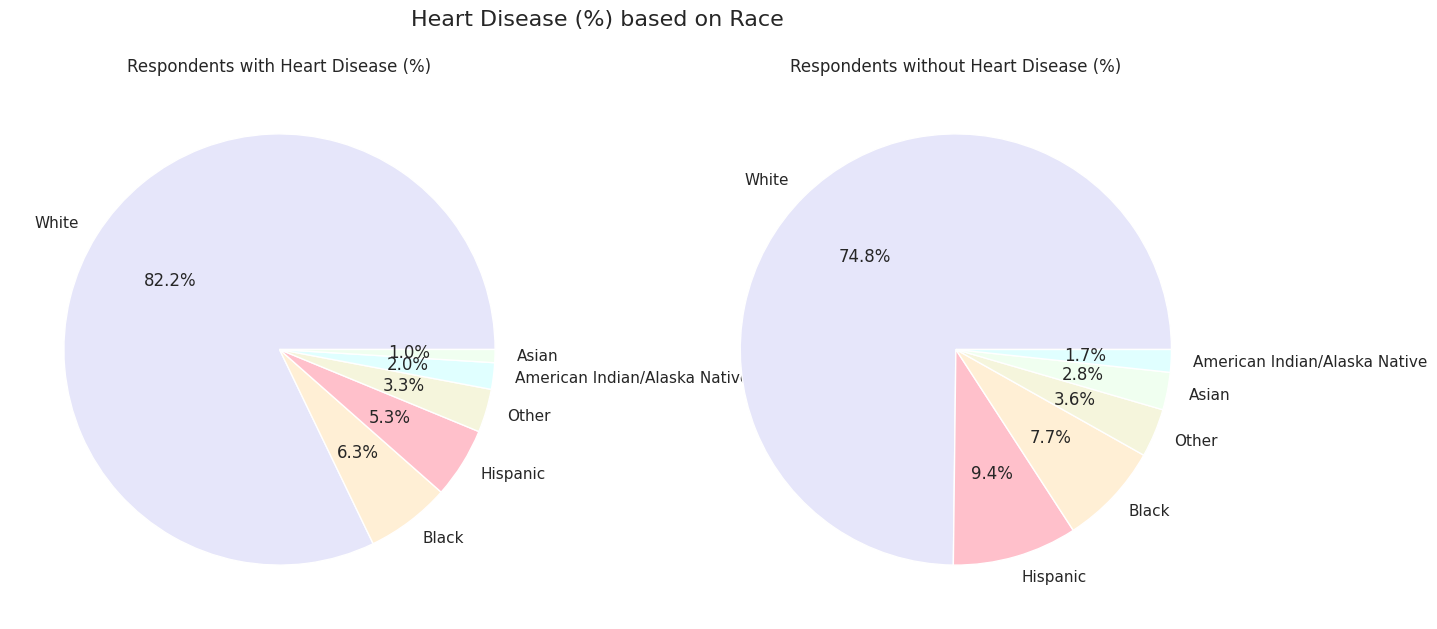

In [83]:
# 2 EDA - Identify the percentage of respondents with and without Heart Disease based on Race using Pie Chart
r_row, r_col = 1, 2
r_fig = plt.figure(figsize= (r_col * 8, r_row * 7)) #figsize: size of the figure. kalau mcm ni, it'll be rectangle as col(x-axis) lgi byk from row(y-axis)
r_fig.suptitle('Heart Disease (%) based on Race', fontsize = 16)
r_gs = r_fig.add_gridspec(r_row, r_col)
r_ax = [[r_fig.add_subplot(r_gs[i, j]) for j in range(r_col)]
        for i in range(r_row)]

# Pie Chart for % of Respondents with Heart Disease
rheartdisease = [len(heart[(heart["HeartDisease"] == "Yes") & (heart["Race"] == "White")]),
                 len(heart[(heart["HeartDisease"] == "Yes") & (heart["Race"] == "Black")]),
                 len(heart[(heart["HeartDisease"] == "Yes") & (heart["Race"] == "Hispanic")]),
                 len(heart[(heart["HeartDisease"] == "Yes") & (heart["Race"] == "Other")]),
                 len(heart[(heart["HeartDisease"] == "Yes") & (heart["Race"] == "American Indian/Alaskan Native")]),
                 len(heart[(heart["HeartDisease"] == "Yes") & (heart["Race"] == "Asian")])]
rax_hd = r_ax[0][0]
rax_hd.pie(rheartdisease,
           labels= ["White", "Black", "Hispanic", "Other", "American Indian/Alaska Native", "Asian"],
           autopct= "%1.1f%%",
           colors= ["lavender","papayawhip","pink","beige","lightcyan","honeydew"])
rax_hd.set_title("Respondents with Heart Disease (%)")

# Pie Chart for % of Respondents without Heart Disease
rnoheartdisease = [len(heart[(heart["HeartDisease"] == "No") & (heart["Race"] == "White")]),
                   len(heart[(heart["HeartDisease"] == "No") & (heart["Race"] == "Hispanic")]),
                   len(heart[(heart["HeartDisease"] == "No") & (heart["Race"] == "Black")]),
                   len(heart[(heart["HeartDisease"] == "No") & (heart["Race"] == "Other")]),
                   len(heart[(heart["HeartDisease"] == "No") & (heart["Race"] == "Asian")]),
                   len(heart[(heart["HeartDisease"] == "No") & (heart["Race"] == "American Indian/Alaskan Native")])]
rax_nohd = r_ax[0][1]
rax_nohd.pie(rnoheartdisease,
           labels= ["White", "Hispanic", "Black", "Other", "Asian", "American Indian/Alaska Native"],
           autopct= "%1.1f%%",
           colors= ["lavender","pink","papayawhip","beige","honeydew","lightcyan"])
rax_nohd.set_title("Respondents without Heart Disease (%)")

# It can be seen that from the pie charts, most of the white population are experiences heart disease compared to
# other populations.

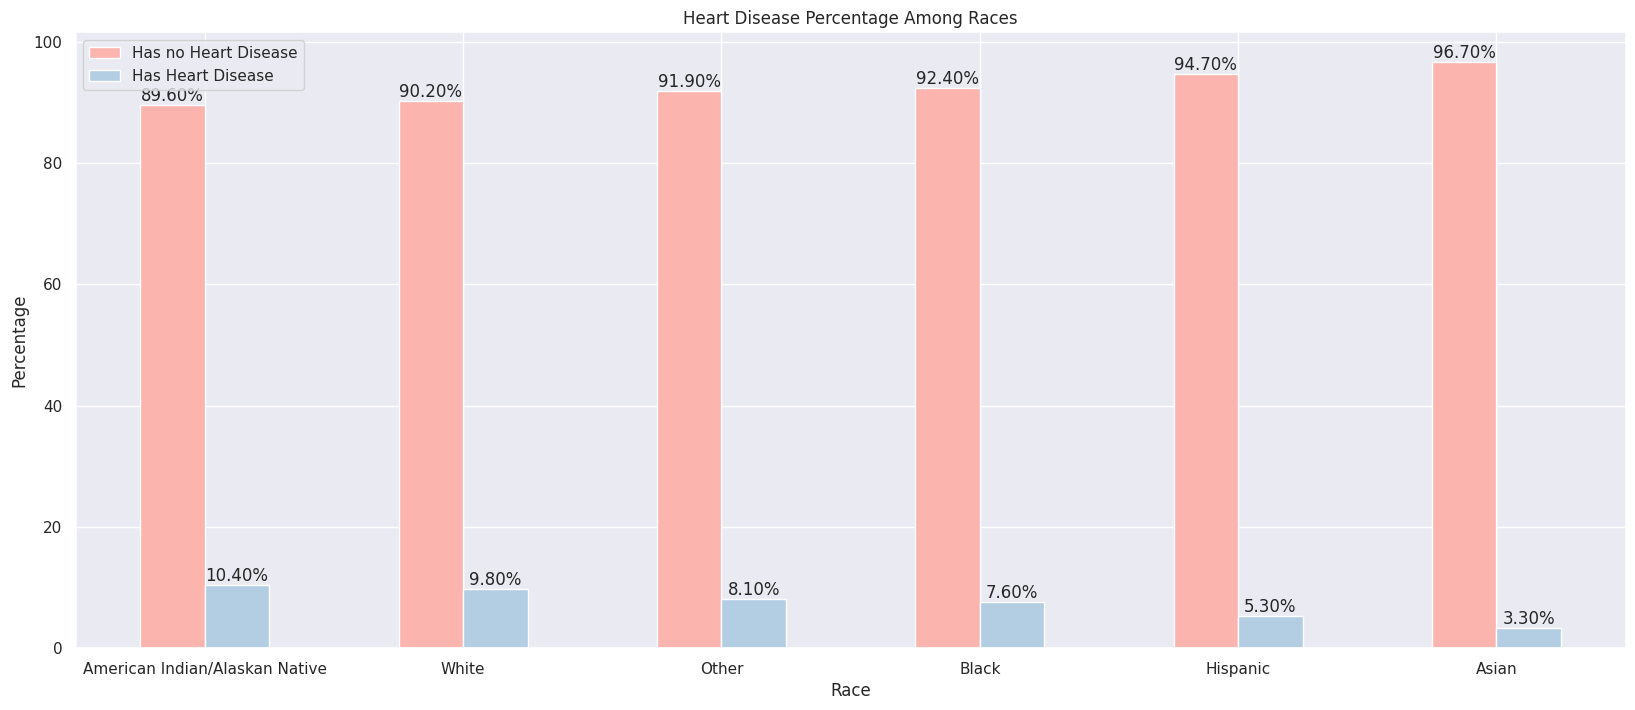

In [84]:
# 3 EDA - Identify the total of respondents with and without Heart Disease based on Race using Grouped Bar Chart

race = ["White", "Black", "Hispanic", "Other", "American Indian/Alaskan Native", "Asian"]
race_percentage_no = []
race_percentage_yes = []
for i in race:
    x = len(heart[(heart["HeartDisease"] == "No") & (heart["Race"] == i)])
    y = len(heart[(heart["HeartDisease"] == "Yes") & (heart["Race"] == i)])
    race_percentage_no.append(round((x/(x+y)*100),2))
    race_percentage_yes.append(round((y/(x+y)*100),2))

# creates pandas DataFrame.
race = {'Has no Heart Disease': race_percentage_no,
        'Has Heart Disease': race_percentage_yes}
race = pd.DataFrame(race, index=['White', 'Black', 'Hispanic', 'Other','American Indian/Alaskan Native', 'Asian'])

#Sort the number of heart disease in descending order
race.sort_values(by=['Has Heart Disease'], axis=0, ascending=False, inplace=True)

# calculate the percent relative to the index
race_percent = race.div(race.sum(axis=1), axis=0).mul(100).round(1)
race_percent

# set the colors for the barchart later
sns.set_palette('Pastel1')

# plot with annotations is probably easier
p1 = race_percent.plot(kind='bar', figsize=(20, 8), rot=0, xlabel='Race', ylabel='Percentage', title="Heart Disease Percentage Among Races")

for p in p1.containers:
    p1.bar_label(p, fmt='%.2f%%', label_type='edge')

# Normalize result
race_pct = race.div(race.sum(1), axis=0)

# Based on the bar chart, heart disease is prevalent in American Indian / Alaskan Native as the race
# has the highest percentage of heart disease compared to other races. On the other hand, Asian has the highest percentage
# among populations that have no heart disease. This means heart disease is rarely found in asian people.

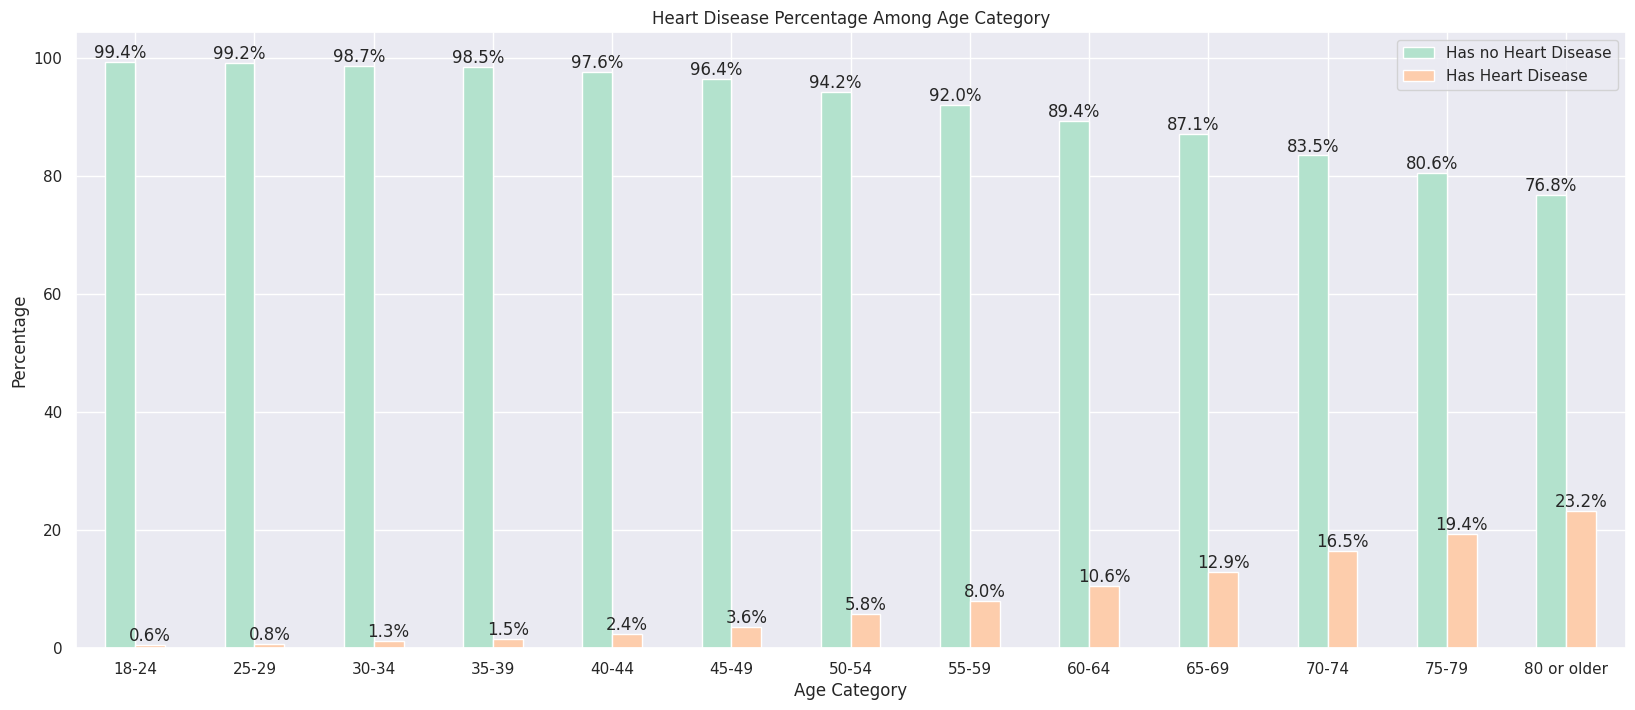

In [85]:
# 4 EDA - Identify the total of respondents with and without Heart Disease based on Age using Grouped Bar Chart

age = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80 or older"]
age_percentage_no = []
age_percentage_yes = []
for i in age:
    x = len(heart[(heart["HeartDisease"] == "No") & (heart["AgeCategory"] == i)])
    y = len(heart[(heart["HeartDisease"] == "Yes") & (heart["AgeCategory"] == i)])
    age_percentage_no.append(round((x/(x+y)*100),2))
    age_percentage_yes.append(round((y/(x+y)*100),2))

Age = {'Has no Heart Disease': age_percentage_no,
       'Has Heart Disease': age_percentage_yes}
Age = pd.DataFrame(Age, index=['18-24', '25-29', '30-34', '35-39','40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'])

# calculate the percent relative to the index
Age_percent = Age.div(Age.sum(axis=1), axis=0).mul(100).round(1) #axis 0: rows, axis 1: columns, mul:multiply
Age_percent

# set the colors for the barchart later
colors = sns.set_palette('Pastel2')

# plot with annotations is probably easier
p1 = Age_percent.plot(kind='bar', color=colors, figsize=(20, 8), rot=0, xlabel='Age Category', ylabel='Percentage', title="Heart Disease Percentage Among Age Category")

for p in p1.containers:
    p1.bar_label(p, fmt='%.1f%%', label_type='edge')

# Normalize result
Age_pct = Age.div(Age.sum(1), axis=0)

# From the chart, the highest percentage of heart disease is found in individuals who are 80 years old or older.
# This indicates that heart disease is prevalent among individuals who are 80 years or older.
# It can also be induced that the probability of getting heart disease increases as the age increases.

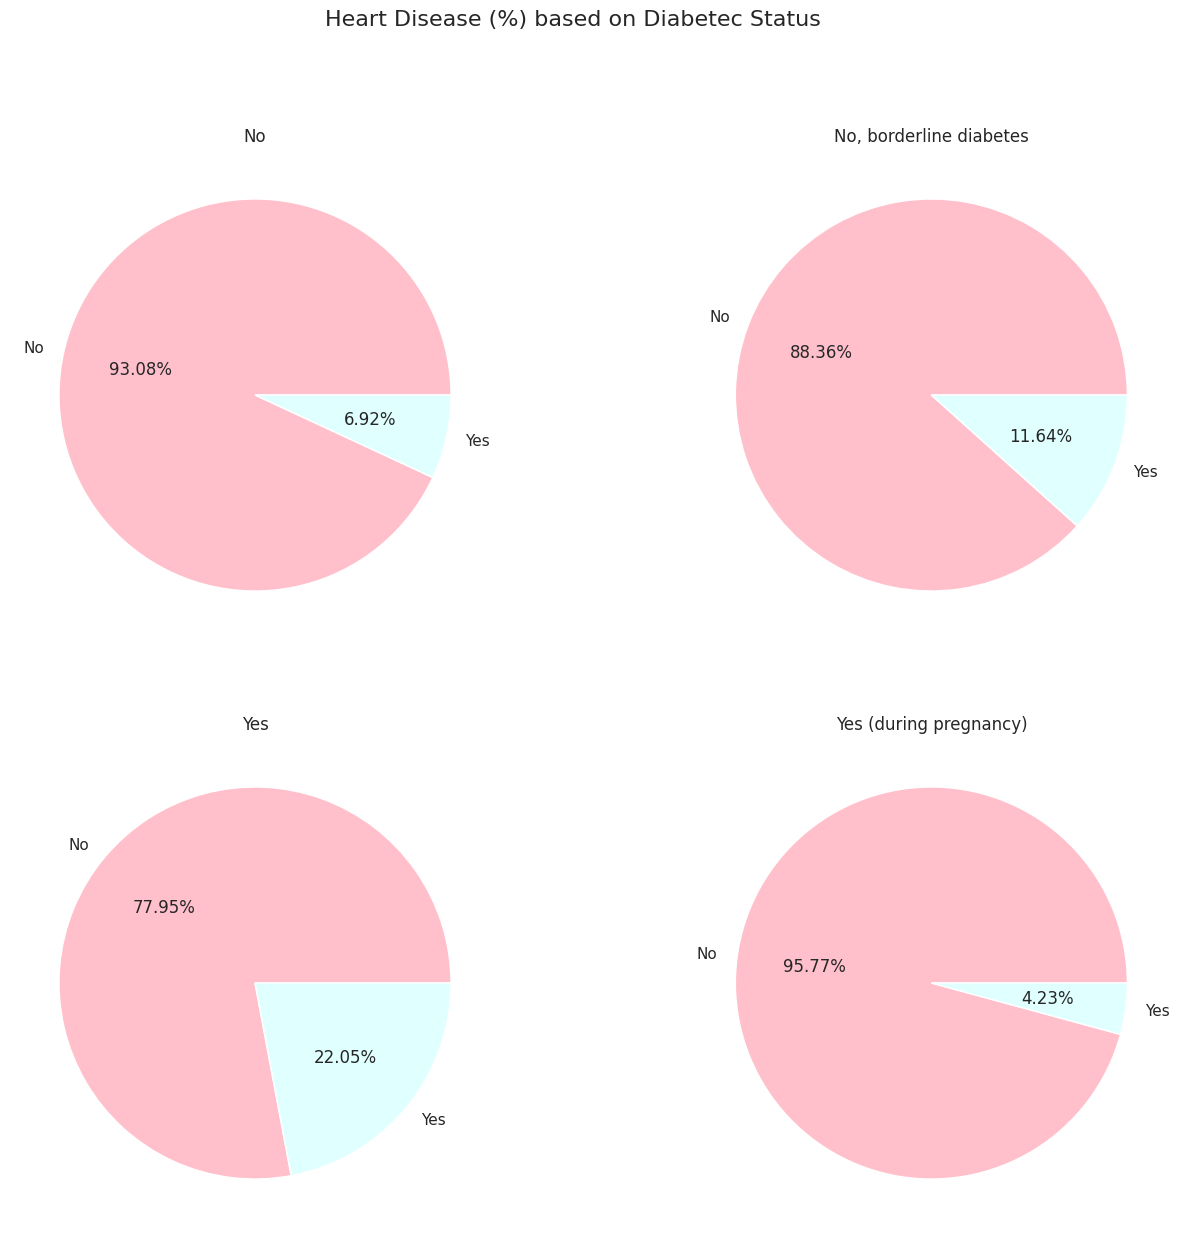

In [86]:
# 5 EDA - Identify the total of respondents with and without Heart Disease based on Presence of Diabetes
# using Grouped Bar Chart

r_row, r_col = 2, 2
r_fig = plt.figure(figsize= (r_col * 8, r_row * 7)) #figsize: size of the figure. kalau mcm ni, it'll be rectangle as col(x-axis) lgi byk from row(y-axis)
r_fig.suptitle('Heart Disease (%) based on Diabetec Status', fontsize = 16)
r_gs = r_fig.add_gridspec(r_row, r_col)
r_ax = [[r_fig.add_subplot(r_gs[i, j]) for j in range(r_col)]
        for i in range(r_row)]

diabetes = ["No", "No, borderline diabetes", "Yes", "Yes (during pregnancy)"]
diabetes_percent = []
column = 0
row = 0
for i, diabetes in enumerate(diabetes):
    if column == 2 :
        column = 0
        row = row + 1
    x = len(heart[(heart["HeartDisease"] == "No") & (heart["Diabetic"] == diabetes)])
    y = len(heart[(heart["HeartDisease"] == "Yes") & (heart["Diabetic"] == diabetes)])
    diabetes_percent = [x,y]
    rax_nohd = r_ax[row][column]
    rax_nohd.pie(diabetes_percent, labels= ["No", "Yes"], autopct= "%.2f%%", colors= ["pink","lightcyan"])
    rax_nohd.set_title(diabetes)
    column = column + 1
    i = i + 1

# Percentage difference between the presence and absence of heart disease in people who have diabetes is small whereas
# in people who do not have diabetes is large. This means that people who have diabetes may have more probability
# of getting heart disease compared to those who do not have diabetes.

Text(0.5, 1.0, 'BMI Category vs Heart Disease')

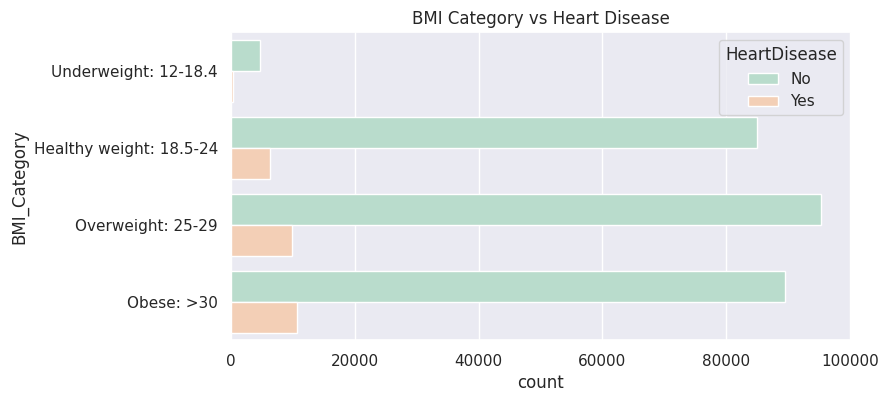

In [87]:
# 6 EDA - Identify the total of respondents with and without Heart Disease based on BMI using Grouped Bar Chart

interval = [12,18.5,25,30,95]
names =['Underweight: 12-18.4','Healthy weight: 18.5-24','Overweight: 25-29','Obese: >30']
heart['BMI_Category']= pd.cut(heart.BMI , bins=interval, labels=names)
heart.BMI_Category.value_counts()
heart

sns.countplot(y = heart.BMI_Category, hue = heart.HeartDisease)
plt.style.context('ggplot')
plt.title('BMI Category vs Heart Disease')

# People who are obese (BMI >30) have higher count of heart disease compared to people who are overweight,
# healthy weight and underweight. However, these values are not that much different.

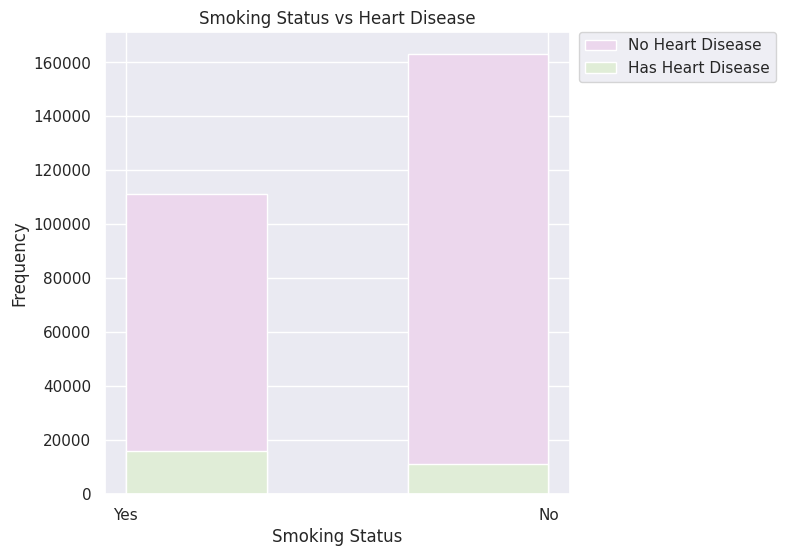

In [88]:
# 7 EDA - Identify the total of respondents with and without Heart Disease based on Smoking Status using Grouped Bar Chart
fig, ax = plt.subplots(figsize = (6,6))

ax.hist(heart[heart["HeartDisease"]=='No']["Smoking"], bins=3, alpha=1, color="#ecd7ed", label="No Heart Disease")
ax.hist(heart[heart["HeartDisease"]=='Yes']["Smoking"], bins=3, alpha=1, color="#e0edd7", label="Has Heart Disease")

ax.set_ylabel("Frequency")
ax.set_xlabel("Smoking Status")
ax.set_title("Smoking Status vs Heart Disease")

ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# We can observe that the people who are smoking are more susceptible to the heart disease.

In [89]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   HeartDisease      301717 non-null  object  
 1   BMI               301717 non-null  float64 
 2   Smoking           301717 non-null  object  
 3   AlcoholDrinking   301717 non-null  object  
 4   Stroke            301717 non-null  object  
 5   PhysicalHealth    301717 non-null  float64 
 6   MentalHealth      301717 non-null  float64 
 7   DiffWalking       301717 non-null  object  
 8   Sex               301717 non-null  object  
 9   AgeCategory       301717 non-null  object  
 10  Race              301717 non-null  object  
 11  Diabetic          301717 non-null  object  
 12  PhysicalActivity  301717 non-null  object  
 13  GenHealth         301717 non-null  object  
 14  SleepTime         301717 non-null  float64 
 15  Asthma            301717 non-null  object  
 16  KidneyD

# Label Encoding

In [122]:
## Convert categorical variables to numerical using label encoding

from sklearn.preprocessing import LabelEncoder
heart['BMI_Category'] = heart['BMI_Category'].astype('object')

# Label encoding for ordinal features
heart_model = heart.copy()
cat=["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "Race", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease","SkinCancer","HeartDisease", "AgeCategory","GenHealth", 'BMI_Category']
le = LabelEncoder()
for col in cat:
    heart_model[col + '_encoded'] = le.fit_transform(heart_model[col])

heart_model.drop(columns=cat, inplace=True)

heart_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 301717 entries, 0 to 319794
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   BMI                       301717 non-null  float64
 1   PhysicalHealth            301717 non-null  float64
 2   MentalHealth              301717 non-null  float64
 3   SleepTime                 301717 non-null  float64
 4   Smoking_encoded           301717 non-null  int64  
 5   AlcoholDrinking_encoded   301717 non-null  int64  
 6   Stroke_encoded            301717 non-null  int64  
 7   DiffWalking_encoded       301717 non-null  int64  
 8   Sex_encoded               301717 non-null  int64  
 9   Race_encoded              301717 non-null  int64  
 10  Diabetic_encoded          301717 non-null  int64  
 11  PhysicalActivity_encoded  301717 non-null  int64  
 12  Asthma_encoded            301717 non-null  int64  
 13  KidneyDisease_encoded     301717 non-null  int64 

# Data Splitting

In [100]:
X = heart_model.drop('HeartDisease_encoded',axis=1)
y = heart_model['HeartDisease_encoded']

# split the dataset into Training (80%) and Testing (20%) Data
from sklearn.model_selection import train_test_split

# since testing is 20% of the data, the random state is 42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, shuffle= True, stratify = y)

# Machine Learning Modelling

#### Data preparation has been made in order to reach the project's objective which is to predict the existence of Heart Disease based on personal indicators. Then the process will continue with data modelling using multiple model types.

## Decision Tree Model

Decision Tree Model
Accuracy Score:  0.8562408855892881


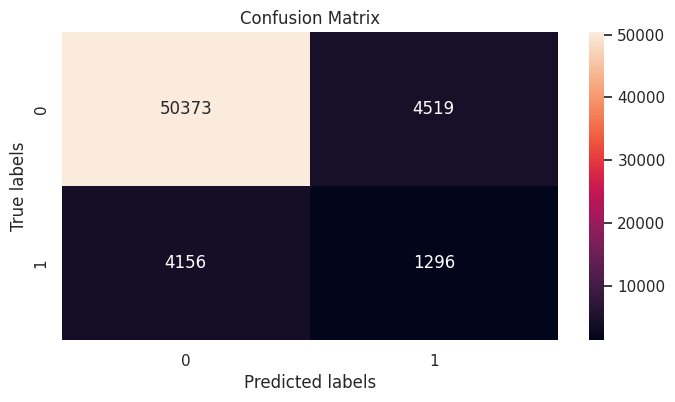

In [119]:
# 3 Model - Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifer = DecisionTreeClassifier(criterion='entropy', random_state=0) # entropy means information gain
classifer.fit(X_train,y_train)
y_pred_3 = classifer.predict(X_test)

# calculate the accuracy score
from sklearn.metrics import accuracy_score
print("Decision Tree Model")
print("Accuracy Score: ",accuracy_score(y_test, y_pred_3))

# get confusio matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_3)
ax = plt.subplot()
sns.set(rc = {'figure.figsize':(8,4)})
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); ax.set_title('Confusion Matrix');
plt.show()

## Random Forest Model

Random Forest Model
Accuracy score: 0.901000928012727


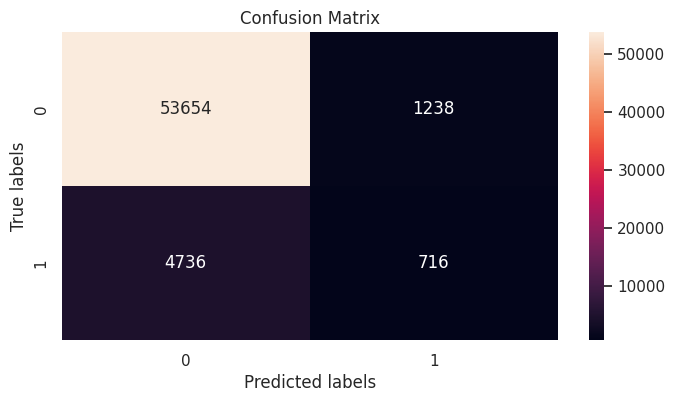

In [120]:
# 1 Model - Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 0, n_estimators=50, max_features=1.0, n_jobs=-1)
model.fit(X_train,y_train)
y_pred_1 = model.predict(X_test)

# calculate the accuracy score
from sklearn.metrics import accuracy_score
AccRF = accuracy_score(y_test, y_pred_1)
print("Random Forest Model")
print("Accuracy score:", AccRF)

# get confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_1)
ax = plt.subplot()
sns.set(rc = {'figure.figsize':(8,4)})
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); ax.set_title('Confusion Matrix');
plt.show()

## Naive Bayes Model

Naive Bayes Model
Accuracy Score:  0.8322451279331831


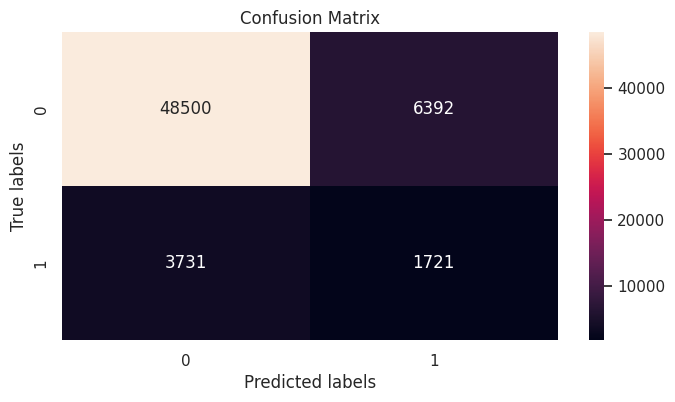

In [121]:
# 2 Model - Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_2 = nb.predict(X_test)

# calculate the accuracy score
from sklearn.metrics import accuracy_score
print("Naive Bayes Model")
print("Accuracy Score: ",accuracy_score(y_test, y_pred_2))

# get confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_2)
ax = plt.subplot()
sns.set(rc = {'figure.figsize':(8,4)})
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); ax.set_title('Confusion Matrix');
plt.show()

# Evaluation

#### Find out the best model to use in this project by calculating the accuracy, recall, F1 score and precision score.

## Random Forest Model

In [116]:
# 1 - Random Forest Model
#Calculate Precision, Recall, F1-Score, and Accurarcy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nClassification Report for Random Forest Model:")
print(classification_report(y_test, y_pred_1))
print("Accuracy of Random Forest Model: %.2f%%" % (accuracy_score(y_test, y_pred_1) * 100.0))


Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     54892
           1       0.37      0.13      0.19      5452

    accuracy                           0.90     60344
   macro avg       0.64      0.55      0.57     60344
weighted avg       0.87      0.90      0.88     60344

Accuracy of Random Forest Model: 90.10%


## Naive Bayes Model

In [117]:
# 2 - Naive Bayes Model
#Calculate Precision, Recall, F1-Score, and Accurarcy
print("\nClassification Report for Naive Bayes Model:")
print(classification_report(y_test, y_pred_2))
print("Accuracy of Naive Bayes Model: %.2f%%" % (accuracy_score(y_test, y_pred_2) * 100.0))


Classification Report for Naive Bayes Model:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91     54892
           1       0.21      0.32      0.25      5452

    accuracy                           0.83     60344
   macro avg       0.57      0.60      0.58     60344
weighted avg       0.86      0.83      0.85     60344

Accuracy of Naive Bayes Model: 83.22%


## Decision Tree Model

In [118]:
# 3 - Decision Tree
#Calculate Precision, Recall, F1-Score, and Accurarcy
print("\nClassification Report for Decisiom Tree Model:")
print(classification_report(y_test, y_pred_3))
print("Accuracy of Decision Tree Model: %.2f%%" % (accuracy_score(y_test, y_pred_3) * 100.0))


Classification Report for Decisiom Tree Model:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     54892
           1       0.22      0.24      0.23      5452

    accuracy                           0.86     60344
   macro avg       0.57      0.58      0.58     60344
weighted avg       0.86      0.86      0.86     60344

Accuracy of Decision Tree Model: 85.62%


# Conclusion
The Random Forest model demonstrates strong performance as the best choice for prediction, boasting a high accuracy of 90.10% and excellent recall for the majority class (Class 0), indicating its effectiveness in identifying non-events. In contrast, the Naive Bayes and Decision Tree models yield lower accuracy rates (83.22% and 85.62%, respectively) and exhibit similar strengths and weaknesses regarding precision and recall for Class 0. The Decision Tree model, while performing comparably in terms of precision and recall for Class 0, is less robust than the Random Forest and is prone to overfitting. Given these insights, the **Random Forest model** stands out as the most reliable option for predicting outcomes, although further enhancements through techniques such as ensemble methods, resampling strategies, and hyperparameter tuning may be explored to refine its performance even further.